In [500]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import sympy as sym

from time import time

In [501]:
# Section
a = -1
b = 2

# Additional data
epsilon = 1e-6
populationSize = 100

# Iterations 
t_max_i = 20
t_max = 100

# Propabilities
probCrossover = 0.5
probMutation = 0.02

In [502]:
def f(x):
    return - x * math.sin(10 * math.pi * x) - 1

In [503]:
def getBitArraySize(n):
    bitArraySize = 0
    
    while n > 0:
        n >>= 1
        bitArraySize += 1
        
    return bitArraySize

In [504]:
def averageOf(vector):
    n = len(vector)
    average = sum(vector) / n
    
    return average

In [505]:
def standartDeviation(value):
    n = len(value)
    average = 1.0 * sum(value) / n

    result = 0
    for i in range(n):
        result += (value[i] - average) ** 2
        
    result = math.sqrt(result / n)
    
    return result

def sigmaScaling(fitnessPopulation, fitnessIndividual, c):
    f_average = averageOf(fitnessPopulation)
    sigma = standartDeviation(fitnessPopulation)
    
    scaled_f = fitnessIndividual + (f_average - c * sigma)
            
    return scaled_f

In [506]:
def bitToFloat(bitArray):
    return a + ((b - a)) / (2**bitArraySize - 1) * int(bitArray, 2)

def fitness(individual):
    return f(bitToFloat(individual))

def populationFitness(population):
    x = []
    fitnesses = []
    
    for individual in population:
        individualFitness = fitness(individual)
        x.append(individual)
        fitnesses.append(individualFitness)
        
    return (x, fitnesses)

In [507]:
def mutation(individual):
    mutationHappend = False
    
    randomProbability = np.random.random_sample()

    if randomProbability <= probMutation:
        mutationHappend = True
        
        charIndexToMutate = np.random.randint(low = 0, high = bitArraySize)
        charToMutate = individual[charIndexToMutate] 

        if charToMutate == '0':
            individual = individual[:charIndexToMutate] + "1" + individual[charIndexToMutate + 1:]
        else:
            individual = individual[:charIndexToMutate] + "0" + individual[charIndexToMutate + 1:]

    return individual, mutationHappend

def crossover(individualOne, individualTwo):  
    crossoverHappend = False
    
    probabilityForCrossover = np.random.random_sample()
    if probabilityForCrossover <= probCrossover:
        crossoverHappend = True
        
        randomIndex = np.random.randint(low = 0, high = bitArraySize)

        firstHalf_IndividualOne = individualOne[:randomIndex]
        secondHalf_IndividualOne = individualOne[randomIndex:]

        firstHalf_IndividualTwo = individualTwo[:randomIndex]
        secondHalf_IndividualTwo = individualTwo[randomIndex:]

        crossoveredOne = firstHalf_IndividualOne + secondHalf_IndividualTwo
        crossoveredTwo = firstHalf_IndividualTwo + secondHalf_IndividualOne
    else:
        crossoveredOne = individualOne
        crossoveredTwo = individualTwo
            
    return crossoveredOne, crossoveredTwo, crossoverHappend

In [508]:
def applyExpectedValueModelForPopulation(population, c):
    newPopulation = []
    populationWithCount = []
        
    f_average = averageOf(populationFitness(population)[1])
    
    # Calculate counters for the population
    for v_j in population:
        f_j = sigmaScaling(populationFitness(population)[1], fitness(v_j), c)
        v_j_const = f_j / f_average
        
        populationWithCount.append((v_j, v_j_const))
        
    while len(newPopulation) < populationSize:
        
        # Randomly select two chromosomes with positive counter
        individuals = []
        if sum(x[1] > 0 for x in populationWithCount) >= 2:
            individuals.append(random.choice([x for x in populationWithCount if x[1] > 0]))
            individuals.append(random.choice([x for x in populationWithCount if x[1] > 0]))
            
            backUpOne = individuals[0]
            backUpTwo = individuals[1]     
        else:
            raise Exception('Population cannot be generated')
            break
       
        individualOne = individuals[0]
        individualTwo = individuals[1]

        # Crossover
        crossoveredOne, crossoveredTwo, crossoverHappend = crossover(individualOne[0], individualTwo[0])
        
        if crossoverHappend:
            individualOne = (crossoveredOne, individualOne[1] - 0.5)
            individualTwo = (crossoveredTwo, individualTwo[1] - 0.5)
        else:
            individualOne = (crossoveredOne, individualOne[1])
            individualTwo = (crossoveredTwo, individualTwo[1])

        # Mutation
        individualOneMutated, ifIndividualOneMutated = mutation(individualOne[0])
        individualTwoMutated, ifIndividualTwoMutated = mutation(individualTwo[0])

        if ifIndividualOneMutated:
            individualOne = (individualOneMutated, individualOne[1] - 1)
        else:
            individualOne = (individualOneMutated, individualOne[1])
            
        if ifIndividualTwoMutated:
            individualTwo = (individualTwoMutated, individualTwo[1] - 1)
        else:
            individualTwo = (individualTwoMutated, individualTwo[1])
            
        # Updating population
        populationWithCount[populationWithCount.index(backUpOne)] = individualOne
        if backUpTwo in populationWithCount:
            populationWithCount[populationWithCount.index(backUpTwo)] = individualTwo
        
        if fitness(individualOne[0]) > fitness(individualTwo[0]):
            best = individualOne[0]
        else:
            best = individualTwo[0]  
        
        newPopulation.append(best)

    return newPopulation

f(x) =  x*sin(10*pi*x) + 1
[a, b] =  [ -1 ,  2 ]

i    =  38
c    =  1
x    =  1.9531257040800343
f(x) =  0.9437166349764521

i    =  22
c    =  2
x    =  1.9531257040800343
f(x) =  0.9437166349764521

i    =  22
c    =  3
x    =  1.9531257040800343
f(x) =  0.9437166349764521

i    =  22
c    =  4
x    =  1.9531257040800343
f(x) =  0.9437166349764521

i    =  22
c    =  5
x    =  1.9531257040800343
f(x) =  0.9437166349764521

Elapsed time is 10.469664 seconds.


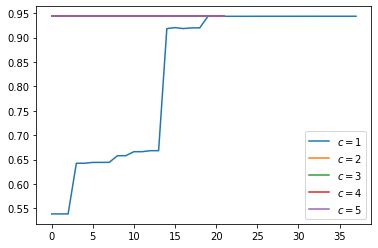

In [509]:
startTime = time()

initialPopulation = []
population = []

n = (int)((b - a) / epsilon)
bitArraySize = getBitArraySize(n)

for i in range(populationSize):
    initialPopulation += [np.random.randint(2, size = (bitArraySize,))]
    
for i in range(populationSize):
    population.append("".join(str(x) for x in initialPopulation[i]))

x = sym.Symbol('x')
print('f(x) = ', x * sym.sin(10 * sym.pi * x) + 1)
print('[a, b] = ', '[', a, ', ', b, ']') 

for c in np.arange(1, 6, 1):
    iterations = []
    functionMinValues = []

    bestFitnessFunctions = []

    i = 0
    max_i = 0

    while i <= t_max:
        try:
            population = applyExpectedValueModelForPopulation(population, c)

            bestX, fitnesses = populationFitness(population)
            bestFitnessFunctions.append(max(fitnesses))

            if i > 1:
                if bestFitnessFunctions[i] - bestFitnessFunctions[i - 1] < epsilon:
                    max_i += 1

            if max_i > t_max_i:
                break

            iterations.append(i)
            functionMinValues.append(bestFitnessFunctions[i])

            i += 1  
        except Exception as ex:
            print(ex, 'for c = {i}'.format(i = c), 'on i = {i}'.format(i = i))
            
            break
            
    if i > 0:
        print('\ni    = ', i)
        print('c    = ', c)
        print('x    = ', bitToFloat(bestX[i - 1]))
        print('f(x) = ', bestFitnessFunctions[i - 1])

    plt.plot(iterations, functionMinValues, label = '$c = {i}$'.format(i = c))
    plt.legend(loc = 'best')

endTime = time()
elapsed = endTime - startTime
print('\nElapsed time is %f seconds.' %elapsed)